<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_7_Addressing_vanishing_issue_in_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

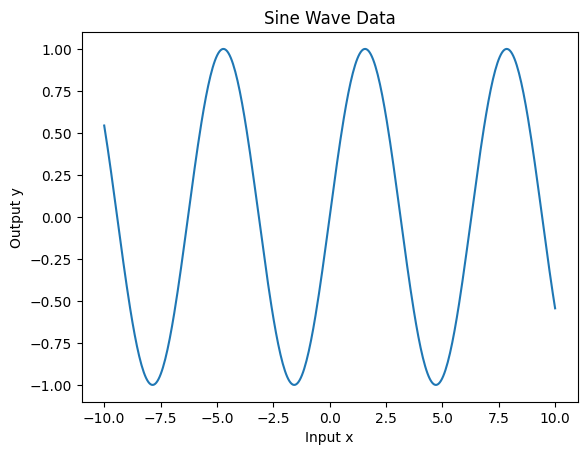

In [16]:
# Sample dataset
x = torch.linspace(-10,10,steps = 400).reshape(-1,1)
y = torch.sin(x)

# Plot
plt.plot(x.numpy(), y.numpy())
plt.title('Sine Wave Data')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()

In [38]:
# Create a Simple Nueral Network Model
class DeepNeuralNetwork(nn.Module):
    def __init__(self,layers):
        super(DeepNeuralNetwork,self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
           self.layers.append(nn.Linear(layers[i],layers[i+1]))

    def forward(self,x):
       for i in range(len(self.layers) - 1):
          x = torch.sigmoid(self.layers[i](x))

       return self.layers[-1](x)

In [39]:
# Train the neural network

# Model, Loss and Optimizer
model = DeepNeuralNetwork([1, 10, 10, 10, 10, 10, 1])
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.MSELoss()

# Training function
def train(model,criterion,optimizer,x,y,epochs):
  losses = []
  for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
      for i, param in enumerate(model.parameters()):
                print(f'Layer {i+1} gradient norm: {param.grad.norm().item()}')
  return losses

Layer 1 gradient norm: 2.9287128199939616e-05
Layer 2 gradient norm: 2.182972139053163e-06
Layer 3 gradient norm: 0.00010436786396894604
Layer 4 gradient norm: 2.5735434974194504e-05
Layer 5 gradient norm: 0.00040212488966062665
Layer 6 gradient norm: 0.0002488082682248205
Layer 7 gradient norm: 0.0025886993389576674
Layer 8 gradient norm: 0.001523096696473658
Layer 9 gradient norm: 0.017197174951434135
Layer 10 gradient norm: 0.010215520858764648
Layer 11 gradient norm: 0.10748980194330215
Layer 12 gradient norm: 0.06648817658424377
Layer 1 gradient norm: 2.8483420464908704e-05
Layer 2 gradient norm: 1.350911816189182e-06
Layer 3 gradient norm: 9.803057764656842e-05
Layer 4 gradient norm: 2.0006013983220328e-06
Layer 5 gradient norm: 0.00010010021651396528
Layer 6 gradient norm: 6.7882187977375e-06
Layer 7 gradient norm: 0.00012146666995249689
Layer 8 gradient norm: 3.154647856717929e-05
Layer 9 gradient norm: 0.0003889709187205881
Layer 10 gradient norm: 0.00021715120237786323
Layer 

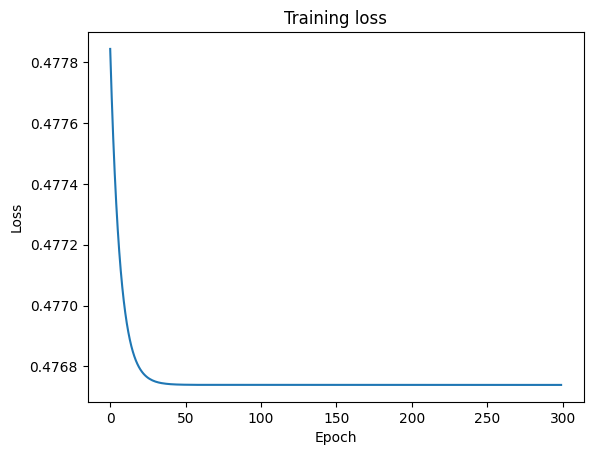

In [40]:
losses = train(model,criterion,optimizer,x,y,300)

plt.plot(losses)
plt.title('Training loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()